# Entaglement > Superdense coding

In [1]:
a = "1"
b = "0"

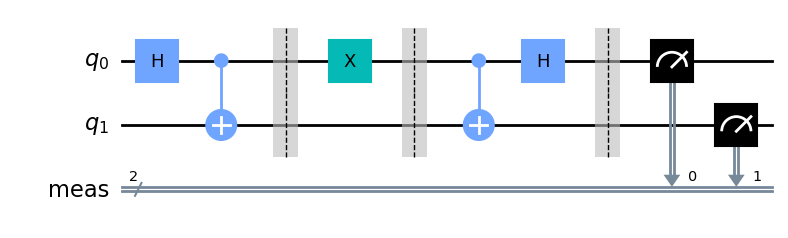

In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations

if b == "1":
    protocol.z(0)
if a == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

protocol.draw("mpl")

Measured 10 with frequency 1.0


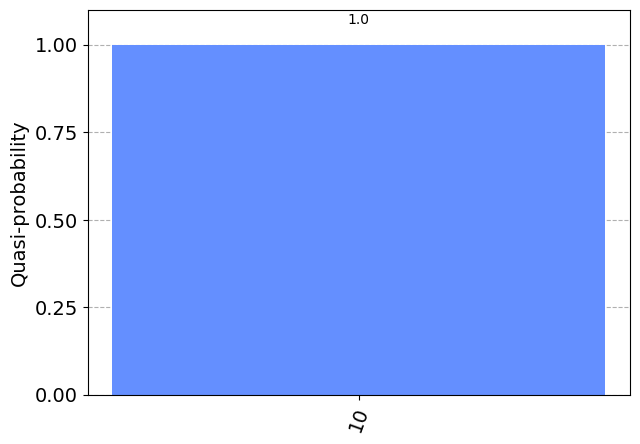

In [9]:
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram

result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()
for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")
plot_histogram(statistics)

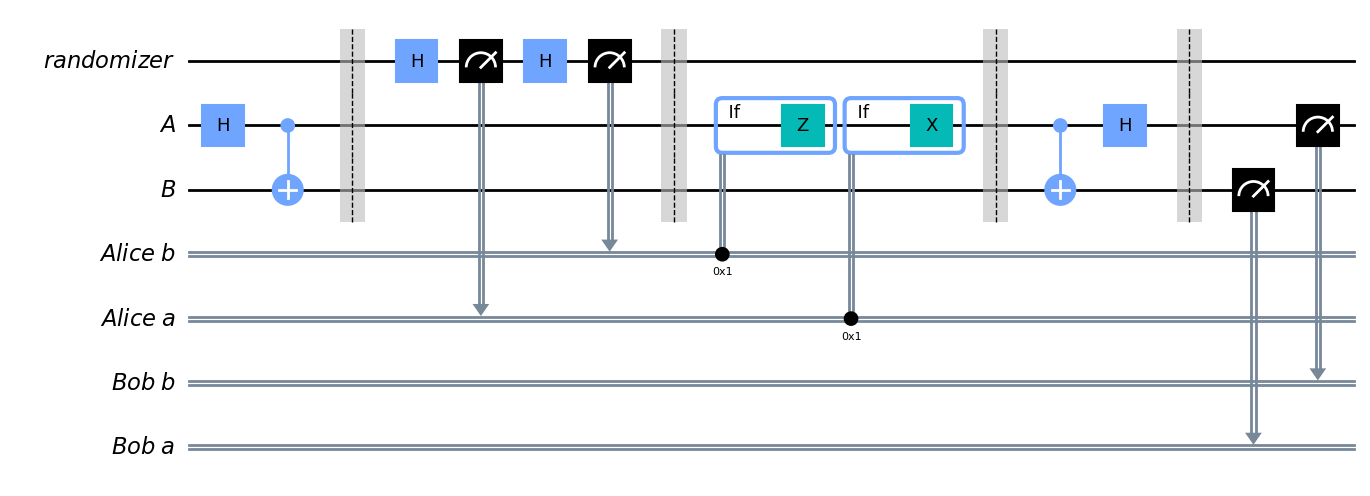

In [11]:
from qiskit import QuantumCircuit

rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_a = ClassicalRegister(1, "Alice a")
Alice_b = ClassicalRegister(1, "Alice b")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_b, Alice_a)

# Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Use the 'randomizer' qubit twice to generate Alice's bits a and b.
test.h(rbg)
test.measure(rbg, Alice_a)
test.h(rbg)
test.measure(rbg, Alice_b)
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with test.if_test((Alice_b, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_a, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_a = ClassicalRegister(1, "Bob a")
Bob_b = ClassicalRegister(1, "Bob b")
test.add_register(Bob_b)
test.add_register(Bob_a)
test.measure(ebit1, Bob_a)
test.measure(ebit0, Bob_b)

test.draw("mpl")

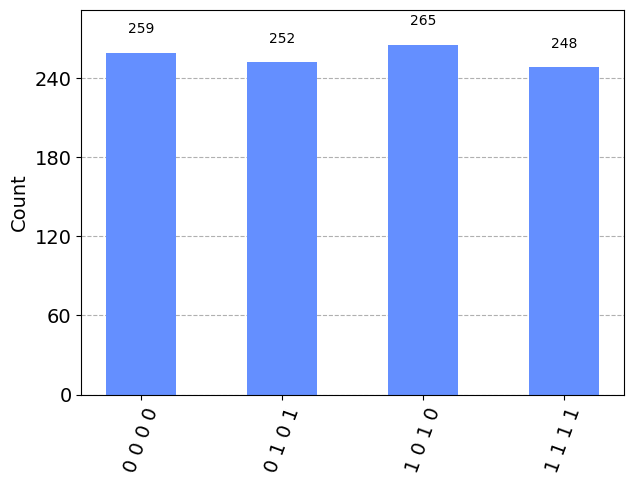

In [12]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

result = AerSimulator().run(test).result()
statistics = result.get_counts()
plot_histogram(statistics)